In [6]:
import pandas as pd
import numpy as np
from mod_genetic import run_genetic as rg
from mod_packs import quantum_potential as qp
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FixedLocator, FormatStrFormatter

In [44]:
price_df = pd.read_excel('PRICE INDEX.xlsx').dropna().set_index('Date')
price_val = price_df.T.values
names = [price_df.columns[i][:3] for i in range(8)]
names
price_df.columns

portfos = np.load('final_portfos.npy')
df={}
for i in range(len(portfos)):
    df.update({'Portfo'+str(i+1):portfos[i]})
portfo_df = pd.DataFrame(df , index=names)

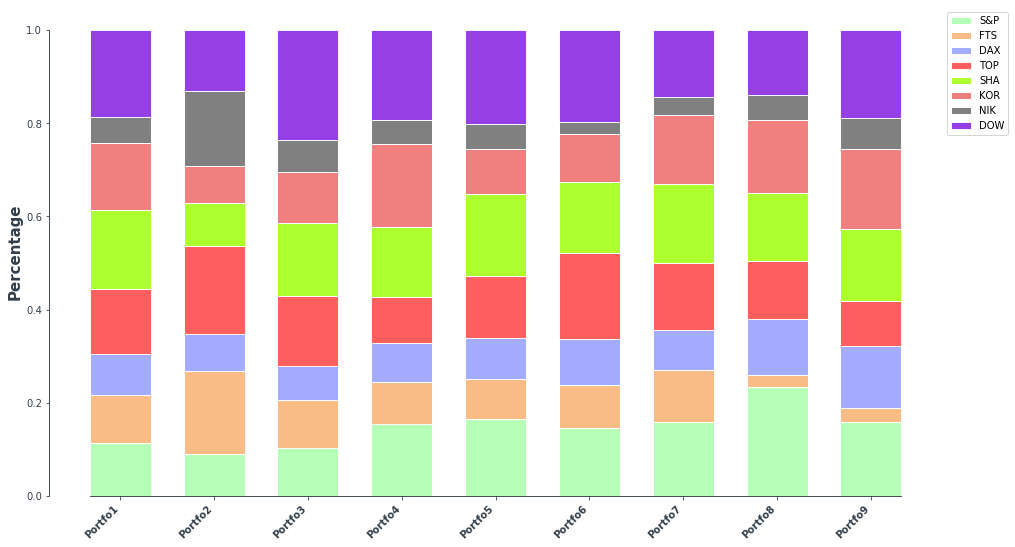

In [50]:
from matplotlib import rc
fig, ax = plt.subplots(figsize=(16,9))

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.9
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

r = [0,1,2,3,4,5,6,7,8]
df = portfo_df.T
barWidth = 0.65
names = df.index
# Create green Bars
plt.bar(r, df[df.columns[0]], color='#b5ffb9', edgecolor='white', width=barWidth ,  label=df.columns[0])
plt.bar(r, df[df.columns[1]], bottom=df[df.columns[0]], color='#f9bc86', edgecolor='white', width=barWidth , label=df.columns[1])
plt.bar(r, df[df.columns[2]], bottom=[i+j for i,j in zip(df[df.columns[0]], df[df.columns[1]])], color='#a3acff', edgecolor='white', width=barWidth, label=df.columns[2])
plt.bar(r, df[df.columns[3]], bottom=[i+j+k for i,j,k in zip(df[df.columns[0]], df[df.columns[1]] , df[df.columns[2]])], color='#ff4d4d', edgecolor='white', width=barWidth , alpha=0.9 ,  label=df.columns[3])
plt.bar(r, df[df.columns[4]], bottom=[i+j+k+l for i,j,k,l in zip(df[df.columns[0]], df[df.columns[1]] , df[df.columns[2]] , df[df.columns[3]])], color='greenyellow', edgecolor='white', width=barWidth , label=df.columns[4])
plt.bar(r, df[df.columns[5]], bottom=[i+j+k+l+m for i,j,k,l,m in zip(df[df.columns[0]], df[df.columns[1]] , df[df.columns[2]] , df[df.columns[3]] , df[df.columns[4]])], color='lightcoral', edgecolor='white', width=barWidth ,label=df.columns[5] )   
plt.bar(r, df[df.columns[6]], bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(df[df.columns[0]], df[df.columns[1]] , df[df.columns[2]] , df[df.columns[3]] , df[df.columns[4]] , df[df.columns[5]])], color='grey', edgecolor='white', width=barWidth ,label=df.columns[6])
plt.bar(r, df[df.columns[7]], bottom=[i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(df[df.columns[0]], df[df.columns[1]] , df[df.columns[2]] , df[df.columns[3]] , df[df.columns[4]] , df[df.columns[5]] , df[df.columns[6]])], color='blueviolet', edgecolor='white', width=barWidth ,alpha=.9 , label=df.columns[7]) 

# Custom x axis
plt.xticks(r, names , fontsize=10, fontweight='black', color = '#333F4B')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Percentage' , fontsize=15, fontweight='black', color = '#333F4B')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# plt.savefig('fig2.png', dpi=300, bbox_inches='tight', transparent = True)

In [51]:
portfo_rets = []
for i in range(len(portfos)):
    portfo_rets.append(qp.ind_generator([qp.scaled_return(price_val[k],1) for k in range(8)],portfos[i]))

In [68]:
q_risks=[]
for i in range(len(portfos)):
    d, u = qp.risk_data_input(portfo_rets[i], 0.0005)
    q_risks.append(u-d)

(0.05, 0.25)

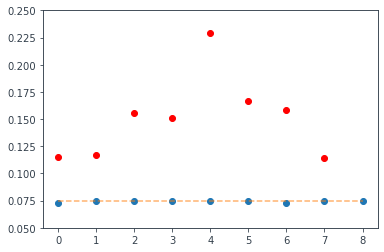

In [72]:
plt.plot(q_risks , 'o')
plt.plot([0,8] , np.ones(2)*np.mean(q_risks) , '--',alpha=0.6 )
plt.plot(each_market_risk , 'ro')
plt.ylim(0.05, 0.25)

In [66]:
each_market_risk = []
for i in range(8):
    d1, u1 = qp.risk_data_input(qp.scaled_return(price_val[i],1), 0.0005)
    each_market_risk.append(u1-d1)

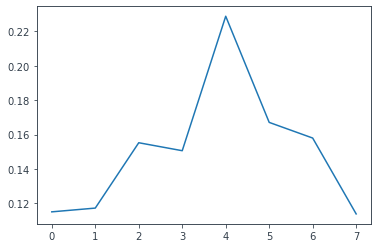

In [67]:
plt.plot(each_market_risk)